In [2]:
import os
from numpy import *
import pandas as pd
import xarray as xr
import matplotlib as mpl
import matplotlib.pyplot as plt
import wget
import cmocean as cmocean

In [3]:
sst_dir='/Users/dhruvbalwada/work_root/sogos/data/raw/Background Data/SST.nc'
ds_sst = xr.load_dataset(sst_dir)
wind_dir='/Users/dhruvbalwada/work_root/sogos/data/raw/Background Data/winds.nc'
ds_wind = xr.load_dataset(wind_dir)
flux_dir='/Users/dhruvbalwada/work_root/sogos/data/raw/Background Data/surf_flux.nc'
ds_flux = xr.load_dataset(flux_dir)

In [4]:
ds = xr.merge([ds_sst, ds_wind, ds_flux])

In [5]:
ds

<xarray.Dataset>
Dimensions:    (latitude: 69, longitude: 81, time: 7344)
Coordinates:
  * longitude  (longitude) float32 25.0 25.25 25.5 25.75 ... 44.5 44.75 45.0
  * latitude   (latitude) float32 -45.0 -45.25 -45.5 ... -61.5 -61.75 -62.0
  * time       (time) datetime64[ns] 2019-03-01 ... 2019-12-31T23:00:00
Data variables:
    sst        (time, latitude, longitude) float32 281.96982 ... 273.61868
    u10        (time, latitude, longitude) float32 12.68317 ... -1.8767202
    v10        (time, latitude, longitude) float32 5.646595 ... -2.0563302
    e          (time, latitude, longitude) float32 -0.00011957242 ... -2.8229551e-06
    slhf       (time, latitude, longitude) float32 -299042.06 ... -7002.2812
    ssr        (time, latitude, longitude) float32 0.125 0.125 ... 0.125 0.125
    str        (time, latitude, longitude) float32 -247549.9 ... -77510.44
    sshf       (time, latitude, longitude) float32 -48915.625 ... -2115.125
    tp         (time, latitude, longitude) float32 7.66

In [6]:
ds.slhf.attrs

{'units': 'J m**-2',
 'long_name': 'Surface latent heat flux',
 'standard_name': 'surface_upward_latent_heat_flux'}

In [8]:
ds.ssr.attrs

{'units': 'J m**-2',
 'long_name': 'Surface net solar radiation',
 'standard_name': 'surface_net_downward_shortwave_flux'}

In [10]:
ds.sshf.attrs

{'units': 'J m**-2',
 'long_name': 'Surface sensible heat flux',
 'standard_name': 'surface_upward_sensible_heat_flux'}

In [11]:
ds.str.attrs

{'units': 'J m**-2',
 'long_name': 'Surface net thermal radiation',
 'standard_name': 'surface_net_upward_longwave_flux'}

## Heat Fluxes

In [29]:
# We add all the fluxes together since in ECMWF positive is always downwards
# So positive short wave will heat the ocean 
# Positive latent would mean that condensation took place.
surf_heat_flux = ds.slhf + ds.ssr + ds.str + ds.sshf

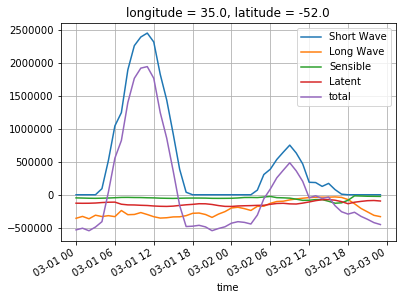

In [30]:
ds.ssr.sel(latitude=-52, longitude=35, method='nearest').isel(time=slice(0,48)).plot(label='Short Wave')
ds.str.sel(latitude=-52, longitude=35, method='nearest').isel(time=slice(0,48)).plot(label='Long Wave')
ds.sshf.sel(latitude=-52, longitude=35, method='nearest').isel(time=slice(0,48)).plot(label='Sensible')
ds.slhf.sel(latitude=-52, longitude=35, method='nearest').isel(time=slice(0,48)).plot(label='Latent')
surf_heat_flux.sel(latitude=-52, longitude=35, method='nearest').isel(time=slice(0,48)).plot(label='total')
plt.grid()
plt.legend()

In [37]:
surf_heat_flux_mean = (surf_heat_flux).rolling(time=24, center=True).mean()

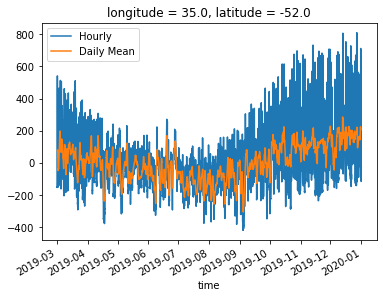

In [42]:
(surf_heat_flux/3600).sel(latitude=-52, longitude=35, method='nearest').plot(label='Hourly')
(surf_heat_flux_mean/3600).sel(latitude=-52, longitude=35, method='nearest').plot(label='Daily Mean')

plt.legend()

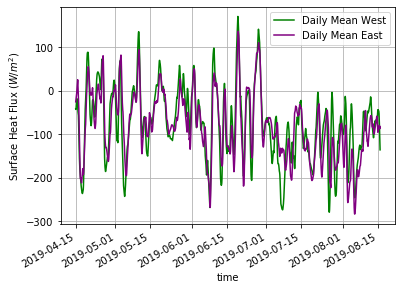

In [52]:
(surf_heat_flux_mean/3600).sel(latitude=slice(-50,-52), longitude=slice(30,34)).sel(time=slice('2019-04-15','2019-08-15')
                                                                                   ).mean(['latitude','longitude']).plot(label='Daily Mean West', color='Green')
(surf_heat_flux_mean/3600).sel(latitude=slice(-52,-54), longitude=slice(35,38)).sel(time=slice('2019-04-15','2019-08-15')
                                                                                   ).mean(['latitude','longitude']).plot(label='Daily Mean East', color='Purple')
plt.ylabel('Surface Heat Flux ($W/m^2$)')
plt.legend()
plt.grid()

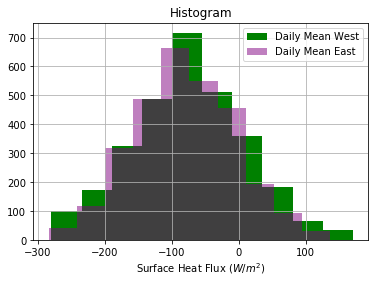

In [95]:
(surf_heat_flux_mean/3600).sel(latitude=slice(-50,-52), longitude=slice(30,34)).sel(time=slice('2019-04-15','2019-08-15')
                                                                                   ).mean(['latitude','longitude']).plot.hist(label='Daily Mean West', color='Green')
(surf_heat_flux_mean/3600).sel(latitude=slice(-52,-54), longitude=slice(35,38)).sel(time=slice('2019-04-15','2019-08-15')
                                                                                   ).mean(['latitude','longitude']).plot.hist(label='Daily Mean East', color='Purple', alpha=0.5)
plt.xlabel('Surface Heat Flux ($W/m^2$)')
plt.legend()
plt.grid()

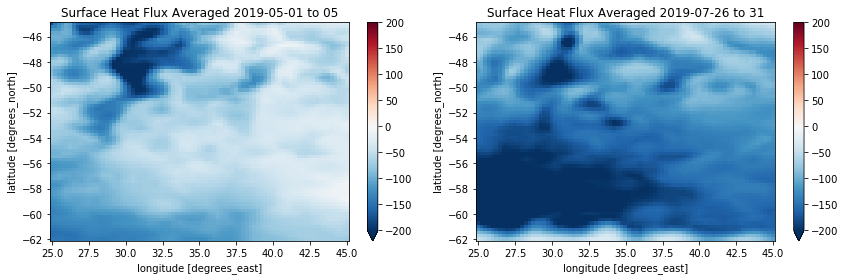

In [64]:
plt.figure(figsize=(12,4))
plt.subplot(121)
(surf_heat_flux_mean/3600).sel(time=slice('2019-05-01','2019-05-05')).mean('time').plot(vmin=-200, vmax=200, cmap='RdBu_r')
plt.title('Surface Heat Flux Averaged 2019-05-01 to 05')

plt.subplot(122)
(surf_heat_flux_mean/3600).sel(time=slice('2019-07-26','2019-07-31')).mean('time').plot(vmin=-200, vmax=200, cmap='RdBu_r')
plt.title('Surface Heat Flux Averaged 2019-07-26 to 31')

plt.tight_layout()

## Freshwater Fluxes

In [65]:
surf_fw_flux = ds.tp + ds.e

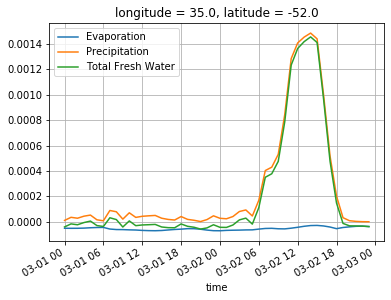

In [67]:
ds.e.sel(latitude=-52, longitude=35, method='nearest').isel(time=slice(0,48)).plot(label='Evaporation')
ds.tp.sel(latitude=-52, longitude=35, method='nearest').isel(time=slice(0,48)).plot(label='Precipitation')
surf_fw_flux.sel(latitude=-52, longitude=35, method='nearest').isel(time=slice(0,48)).plot(label='Total Fresh Water')
plt.legend()
plt.grid()

In [68]:
surf_fw_flux_mean = (surf_fw_flux).rolling(time=24, center=True).mean()

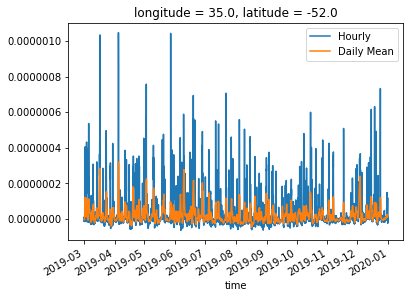

In [69]:
(surf_fw_flux/3600).sel(latitude=-52, longitude=35, method='nearest').plot(label='Hourly')
(surf_fw_flux_mean/3600).sel(latitude=-52, longitude=35, method='nearest').plot(label='Daily Mean')

plt.legend()

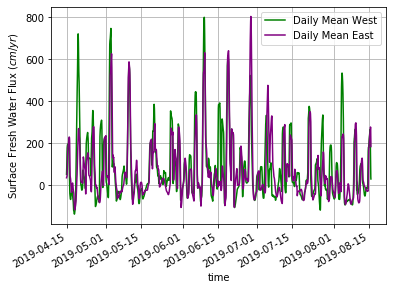

In [72]:

(surf_fw_flux_mean/3600 * 100*360*24*3600).sel(latitude=slice(-50,-52), longitude=slice(30,34)).sel(time=slice('2019-04-15','2019-08-15')
                                                                                   ).mean(['latitude','longitude']).plot(label='Daily Mean West', color='Green')
(surf_fw_flux_mean/3600 * 100*360*24*3600).sel(latitude=slice(-52,-54), longitude=slice(35,38)).sel(time=slice('2019-04-15','2019-08-15')
                                                                                   ).mean(['latitude','longitude']).plot(label='Daily Mean East', color='Purple')
plt.ylabel('Surface Fresh Water Flux ($cm/yr$)')
plt.legend()
plt.grid()


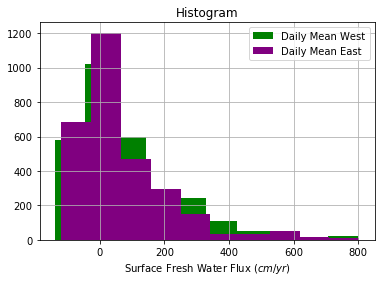

In [94]:

(surf_fw_flux_mean/3600 * 100*360*24*3600).sel(latitude=slice(-50,-52), longitude=slice(30,34)).sel(time=slice('2019-04-15','2019-08-15')
                                                                                   ).mean(['latitude','longitude']).plot.hist(label='Daily Mean West', color='Green')
(surf_fw_flux_mean/3600 * 100*360*24*3600).sel(latitude=slice(-52,-54), longitude=slice(35,38)).sel(time=slice('2019-04-15','2019-08-15')
                                                                                   ).mean(['latitude','longitude']).plot.hist(label='Daily Mean East', color='Purple')
plt.xlabel('Surface Fresh Water Flux ($cm/yr$)')
plt.legend()
plt.grid()


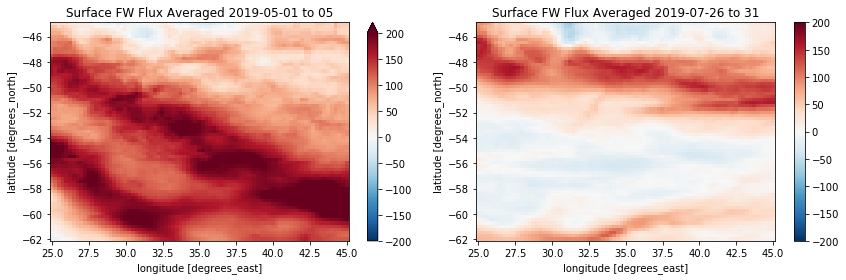

In [75]:
plt.figure(figsize=(12,4))
plt.subplot(121)
(surf_fw_flux_mean/3600 * 100*360*24*3600).sel(time=slice('2019-05-01','2019-05-05')).mean('time').plot(vmin=-200, vmax=200, cmap='RdBu_r')
plt.title('Surface FW Flux Averaged 2019-05-01 to 05')

plt.subplot(122)
(surf_fw_flux_mean/3600 * 100*360*24*3600).sel(time=slice('2019-07-26','2019-07-31')).mean('time').plot(vmin=-200, vmax=200, cmap='RdBu_r')
plt.title('Surface FW Flux Averaged 2019-07-26 to 31')

plt.tight_layout()

## Wind Stress

In [76]:
wind_speed = (ds.u10**2 + ds.v10**2)**0.5

In [78]:
wind_speed_mean = (wind_speed).rolling(time=24, center=True).mean()

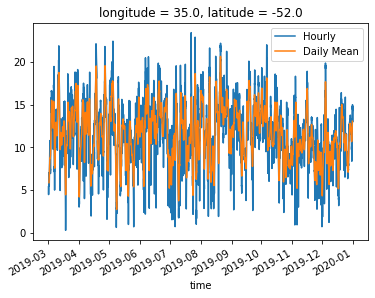

In [79]:
wind_speed.sel(latitude=-52, longitude=35, method='nearest').plot(label='Hourly')
wind_speed_mean.sel(latitude=-52, longitude=35, method='nearest').plot(label='Daily Mean')

plt.legend()

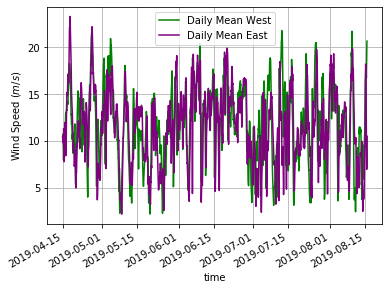

In [80]:

wind_speed.sel(latitude=slice(-50,-52), longitude=slice(30,34)).sel(time=slice('2019-04-15','2019-08-15')
                                                                                   ).mean(['latitude','longitude']).plot(label='Daily Mean West', color='Green')
wind_speed.sel(latitude=slice(-52,-54), longitude=slice(35,38)).sel(time=slice('2019-04-15','2019-08-15')
                                                                                   ).mean(['latitude','longitude']).plot(label='Daily Mean East', color='Purple')
plt.ylabel('Wind Speed ($m/s$)')
plt.legend()
plt.grid()


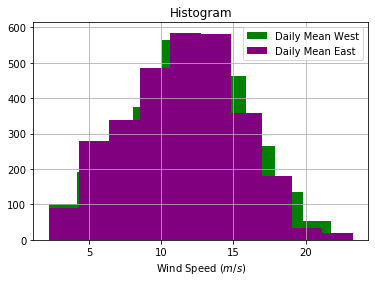

In [96]:

wind_speed.sel(latitude=slice(-50,-52), longitude=slice(30,34)).sel(time=slice('2019-04-15','2019-08-15')
                                                                                   ).mean(['latitude','longitude']).plot.hist(label='Daily Mean West', color='Green')
wind_speed.sel(latitude=slice(-52,-54), longitude=slice(35,38)).sel(time=slice('2019-04-15','2019-08-15')
                                                                                   ).mean(['latitude','longitude']).plot.hist(label='Daily Mean East', color='Purple')
plt.xlabel('Wind Speed ($m/s$)')
plt.legend()
plt.grid()


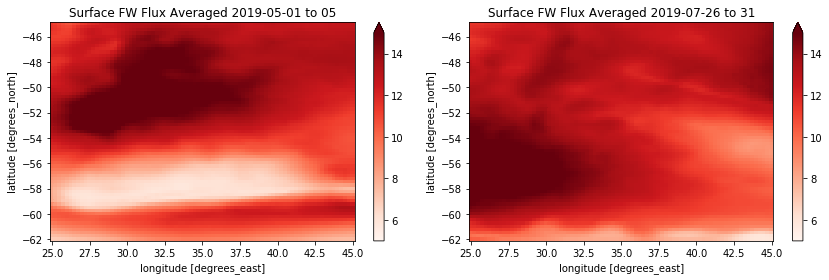

In [85]:
plt.figure(figsize=(12,4))
plt.subplot(121)
wind_speed.sel(time=slice('2019-05-01','2019-05-01')).mean('time').plot(vmin=5, vmax=15, cmap='Reds')
plt.title('Surface FW Flux Averaged 2019-05-01 to 05')

plt.subplot(122)
wind_speed.sel(time=slice('2019-07-31','2019-07-31')).mean('time').plot(vmin=5, vmax=15, cmap='Reds')
plt.title('Surface FW Flux Averaged 2019-07-26 to 31')

plt.tight_layout()

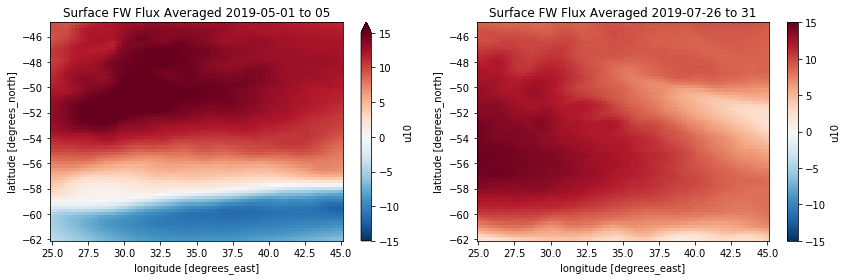

In [88]:
plt.figure(figsize=(12,4))
plt.subplot(121)
ds.u10.sel(time=slice('2019-05-01','2019-05-01')).mean('time').plot(vmin=-15, vmax=15, cmap='RdBu_r')
plt.title('Surface FW Flux Averaged 2019-05-01 to 05')

plt.subplot(122)
ds.u10.sel(time=slice('2019-07-31','2019-07-31')).mean('time').plot(vmin=-15, vmax=15, cmap='RdBu_r')
plt.title('Surface FW Flux Averaged 2019-07-26 to 31')

plt.tight_layout()

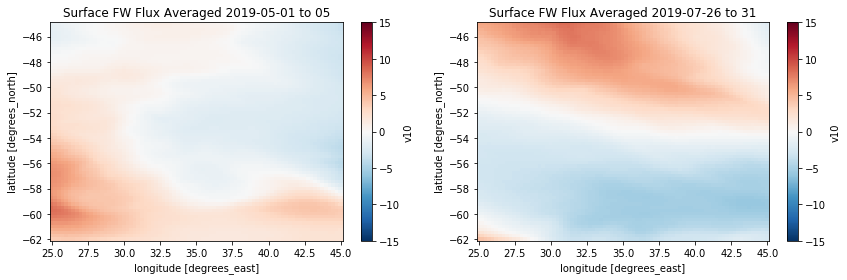

In [89]:
plt.figure(figsize=(12,4))
plt.subplot(121)
ds.v10.sel(time=slice('2019-05-01','2019-05-01')).mean('time').plot(vmin=-15, vmax=15, cmap='RdBu_r')
plt.title('Surface FW Flux Averaged 2019-05-01 to 05')

plt.subplot(122)
ds.v10.sel(time=slice('2019-07-31','2019-07-31')).mean('time').plot(vmin=-15, vmax=15, cmap='RdBu_r')
plt.title('Surface FW Flux Averaged 2019-07-26 to 31')

plt.tight_layout()

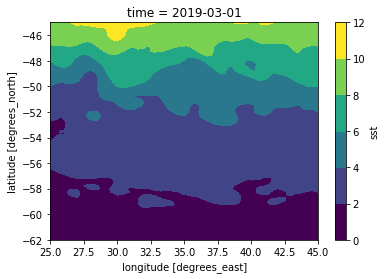

In [9]:
(ds.sst-273.15).isel(time=0).plot.contourf()